In [2]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

/home/naveed/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Module 1


#### Dough ball detection

/home/naveed/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


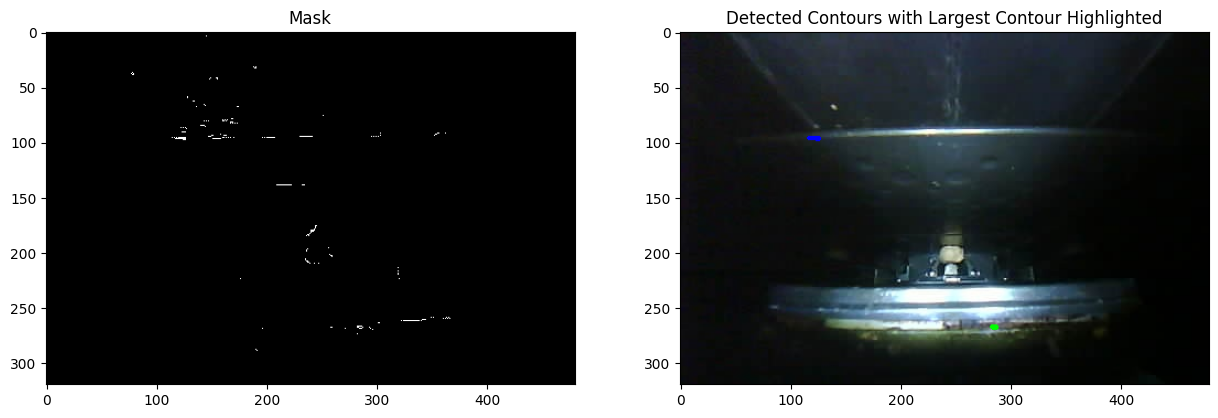

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_doughball_color_based(image):
    # Step 1: Convert to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Step 2: Define the color range for doughball detection
    # Using the given HSV values (81, 12.2, 74.1) and setting a range around them
    lower_color = np.array([76, 0, 40])    # Lower HSV threshold
    upper_color = np.array([86, 50, 110])  # Upper HSV threshold
    
    # Create a mask to isolate the doughball color
    mask = cv2.inRange(hsv_image, lower_color, upper_color)
    
    # # Step 3: Morphological operations to clean up the mask
    # kernel = np.ones((5, 5), np.uint8)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Close small holes in the mask
    # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # Remove small noise
    
    # Step 4: Contour Detection
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter out small contours (if needed)
    contours = [contour for contour in contours if cv2.contourArea(contour) > 5]
    
    if len(contours) == 0:
        return None, mask, None

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    
    return largest_contour, mask, contours

# Example usage with a sample image
image = cv2.imread('image collection/CV Image Collection/01 DB Detection and Centering/480x320/With Load/DB after 2nd tap/Trial 1.jpg')
largest_contour, mask, contours = detect_doughball_color_based(image)

if largest_contour is not None:
    # Step 5: Draw the contours on the original image for visualization
    result_image = image.copy()
    cv2.drawContours(result_image, contours, -1, (0, 255, 0), 2)  # Draw all contours
    cv2.drawContours(result_image, [largest_contour], -1, (255, 0, 0), 2)  # Highlight largest contour in red

    # Display the result
    plt.figure(figsize=(15, 15))
    plt.subplot(121)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Contours with Largest Contour Highlighted')
    plt.show()
else:
    print("Doughball not detected")

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_doughball_color_based(image):
    # Step 1: Convert to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    #(81, 12.2, 74.1)
    # Step 2: Adjusted color range for doughball detection
    # Increasing the tolerance range to capture more variations in doughball color
    lower_color = np.array([75, 10, 60])   # Increased tolerance for hue and value
    upper_color = np.array([85, 15, 85]) # Increased tolerance for saturation and value
    
    # Create a mask to isolate the doughball color
    mask = cv2.inRange(hsv_image, lower_color, upper_color)
    
    # Step 3: Morphological operations to clean up the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Close small holes in the mask
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # Remove small noise
    
    # Step 4: Contour Detection
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        print("No contours found")
        return None, mask, None
    
    # Display the result with all contours drawn
    result_image = image.copy()
    cv2.drawContours(result_image, contours, -1, (0, 255, 0), 2)  # Draw all contours

    # Display the mask and the result image with contours
    plt.figure(figsize=(15, 15))
    plt.subplot(121)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask with Adjusted Range')
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Contours with Adjusted Range')
    plt.show()

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    
    return largest_contour, mask, contours

# Example usage with a sample image
image = cv2.imread('image collection/CV Image Collection/01 DB Detection and Centering/480x320/With Load/DB after 2nd tap/Trial 1.jpg')
largest_contour, mask, contours = detect_doughball_color_based(image)

No contours found


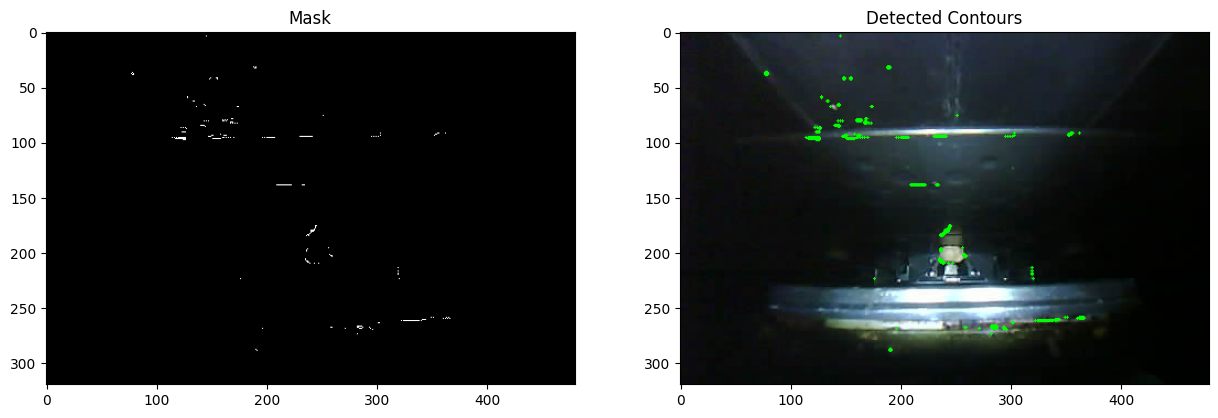

In [3]:
target_color = np.array([81, 12.2, 74.1])

# detect doughball color based on the given HSV values in th complete image
def detect_doughball_color_based(image):
    # Step 1: Convert to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Step 2: Define the color range for doughball detection
    # Using the given HSV values (81, 12.2, 74.1) and setting a range around them
    lower_color = np.array([76, 0, 40])    # Lower HSV threshold
    upper_color = np.array([86, 50, 110])  # Upper HSV threshold
    
    # Create a mask to isolate the doughball color
    mask = cv2.inRange(hsv_image, lower_color, upper_color)
    
    # # Step 3: Morphological operations to clean up the mask
    # kernel = np.ones((5, 5), np.uint8)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Close small holes in the mask
    # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # Remove small noise
    
    # Step 4: Contour Detection
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        return None, mask, None
    
    # display the contours
    result_image = image.copy()
    cv2.drawContours(result_image, contours, -1, (0, 255, 0), 2)  # Draw all contours

    # Display the result
    plt.figure(figsize=(15, 15))
    plt.subplot(121)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Contours')
    plt.show()

    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    
    return largest_contour, mask, contours

# Example usage with a sample image
image = cv2.imread('image collection/CV Image Collection/01 DB Detection and Centering/480x320/With Load/DB after 2nd tap/Trial 1.jpg')
largest_contour, mask, contours = detect_doughball_color_based(image)

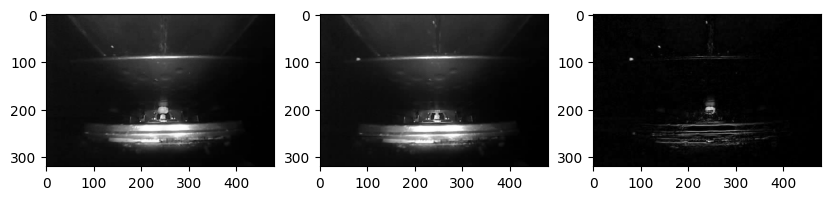

: 

In [4]:
import cv2
import numpy as np

def detect_doughball(image):
    # Step 1: Preprocessing
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    blurred_image = gray_image
    
    # Step 2: Background Subtraction and Thresholding
    #Assuming a reference background image is available (substitute with actual reference image)
    background_image = cv2.imread('image collection/CV Image Collection/01 DB Detection and Centering/480x320/Without Load/DB after 2nd tap/Trial 1.jpg', cv2.IMREAD_GRAYSCALE)
    background_subtracted = cv2.absdiff(blurred_image, background_image)

    # display the images and the difference
    plt.figure(figsize=(10, 10))
    plt.subplot(131)
    plt.imshow(blurred_image, cmap='gray')

    plt.subplot(132)
    plt.imshow(background_image, cmap='gray')

    plt.subplot(133)
    plt.imshow(background_subtracted, cmap='gray')
    cv2.imwrite('background_subtracted.jpg', background_subtracted)
    plt.show()
    
    # For simplicity, we are using only adaptive thresholding here
    threshold_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY_INV, 11, 2)
    
    # Step 3: Contour Detection and Filtering, here we will try to find the largest contour of white blobs in the image. that will be our doughball
    contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours
    contours = [contour for contour in contours if cv2.contourArea(contour) > 100]

    if len(contours) == 0:
        return None, None, None
    
    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Step 4: Fit a circle to the contour
    center, radius = cv2.minEnclosingCircle(largest_contour)
    center = tuple(map(int, center))
    radius = int(radius)


    return result_image, center, radius


# Example usage with a sample image
image = cv2.imread('image collection/CV Image Collection/01 DB Detection and Centering/480x320/With Load/DB after 2nd tap/Trial 1.jpg')
result_image, center, radius = detect_doughball(image)

if result_image is not None:
    cv2.imshow('Doughball Detected', result_image)
    cv2.waitKey(0)
else:
    print("Doughball not detected")